Mean Squared Error: 16.79978641624176
Root Mean Squared Error (RMSE): 4.098754251750373
Mean Absolute Error (MAE): 2.987636566628387
R² (R-squared): 0.8045778124450405


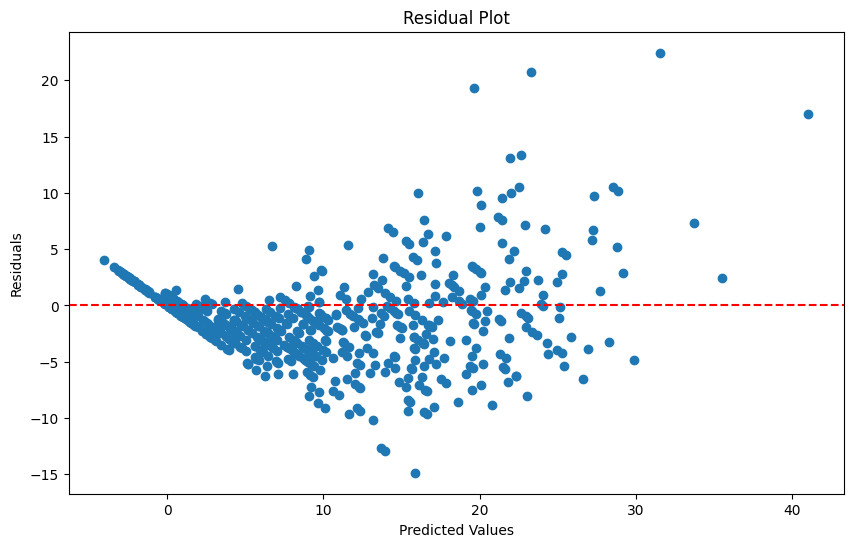

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodel_3s.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodel_3s.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


players_df_3 = pd.read_csv('../../data/processed/lr_model_manual_feature_training_testing_dataset.csv')
players_df_3.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_3 = players_df_3[players_df_3['Season'] != 2024].reset_index(drop=True)
testing_df_3 = players_df_3[players_df_3['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_3 = training_df_3.drop(columns=['HR', 'Season'])
y_train_3 = training_df_3['HR']

X_test_3 = testing_df_3.drop(columns=['HR', 'Season'])
y_test_3 = testing_df_3['HR']

# Train a linear regression model
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)

# Make predictions on the test set
y_pred = model_3.predict(X_test_3)

# Evaluate the model_3 (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test_3, y_pred)
print(f'Mean Squared Error: {mse}')

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test_3, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test_3, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test_3, y_pred)
print("R² (R-squared):", r2)

# Residuals (actual - predicted values)
residuals = y_test_3 - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
X_train_3.insert(0, 'intercept', 1)
X_test_3.insert(0, 'intercept', 1)
sm_model_3 = sm.OLS(y_train_3, X_train_3).fit()
sm_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     5312.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:58:34   Log-Likelihood:                -20724.
No. Observations:                7404   AIC:                         4.146e+04
Df Residuals:                    7397   BIC:                         4.151e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.4489      0.108    -22.634      0.000      -2.661      -2.237
G              0.0092      0.002      3.848      0.000       0.005       0.014
RBI/G          8.6854      0.312     27.797      0.000       8.073       9.298
BB             0.1375      0.005     30.072      0.000       0.129       0.146
SO             0.0730      0.003     27.175      0.000       0.068       0.078
Barrel%       16.0521      1.093     14.685      0.000      13.909      18.195
HardHit%      -1.6095      0.314     -5.122      0.000      -2.225      -0.994
==============================================================================
Omnibus:                     1274.311   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6353.478
Skew:                           0.744   Prob(JB):                         0.00
Kurtosis:                       7.287   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_test_3_predictions = sm_model_3.predict(X_test_3)

r2 = r2_score(y_test_3, y_test_3_predictions)

print(f"R squared: {r2}")

R squared: 0.8045778124450405
